In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
data=pd.read_csv("Dataset.csv")

In [3]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [4]:
len(data.columns)

18

In [5]:
len(data)

8950

In [6]:
data=data._get_numeric_data()

In [7]:
len(data.columns)

17

In [8]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
data['BALANCE'].isnull().sum()

0

In [10]:
y=len(data)*0.7
for x in data.columns :
    NAN=data[x].isnull().sum()
    if NAN==0:
        continue
    if NAN<y:
        data.fillna(value=data[x].mean(),inplace= True)
    if NAN>=y:
        data.drop(x, axis=1, inplace=True)

In [11]:
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

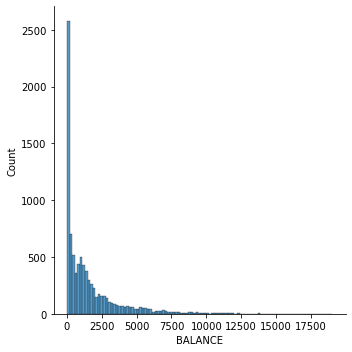

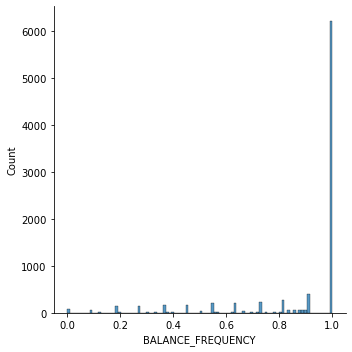

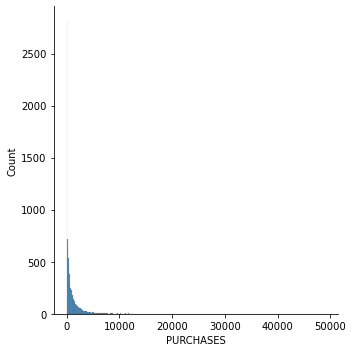

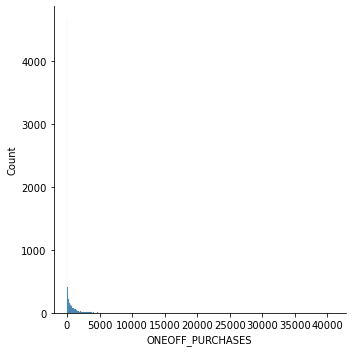

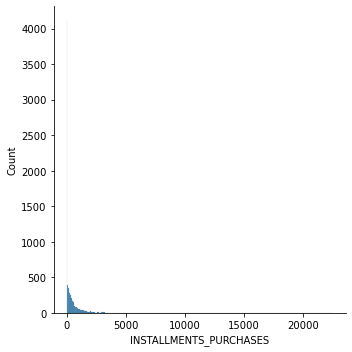

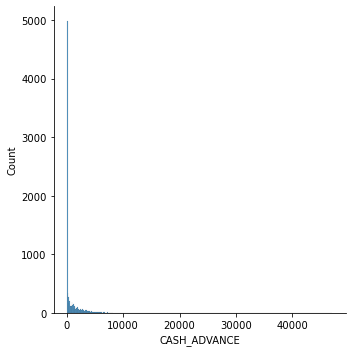

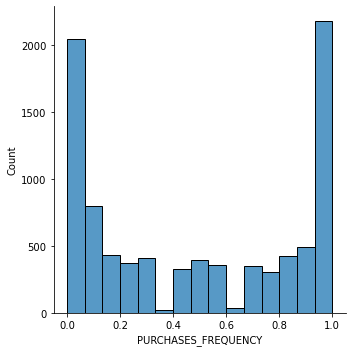

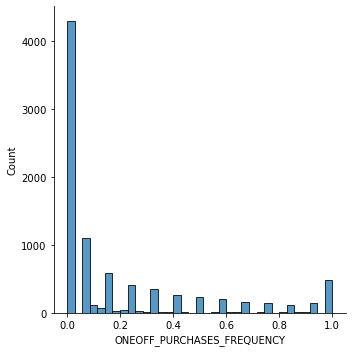

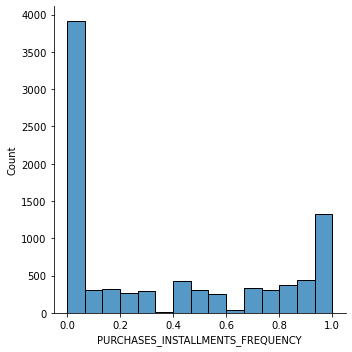

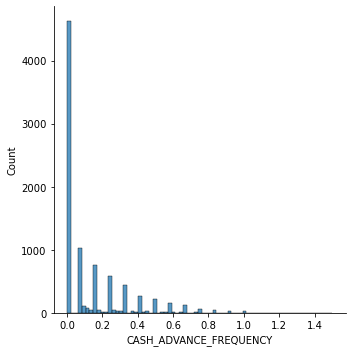

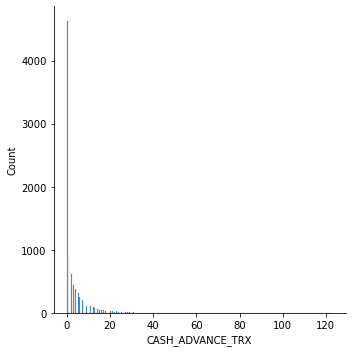

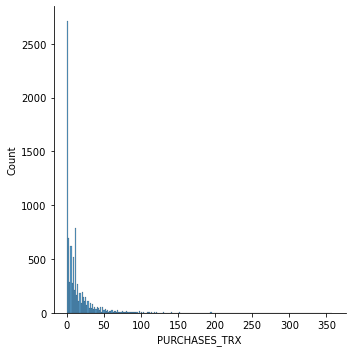

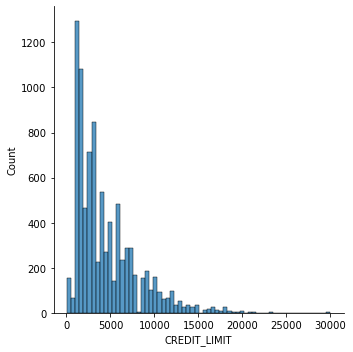

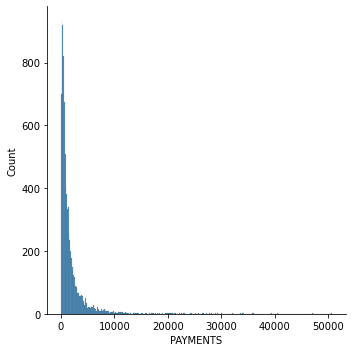

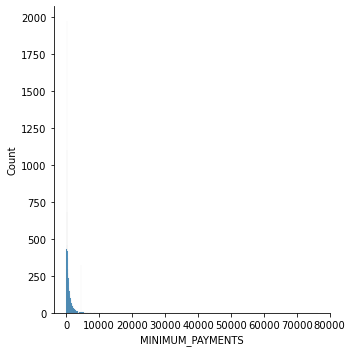

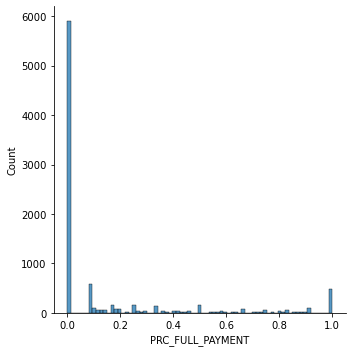

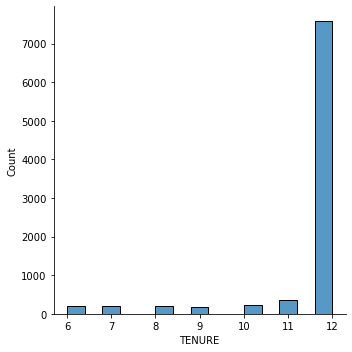

In [12]:
for x in data.columns:
    sns.displot(data[x])

In [13]:
for x in data.columns:
    print(data[x].skew())

2.393386042571806
-2.0232655185149078
8.144269064554651
10.045082884700278
7.299119908745641
5.166609074074723
0.06016423585803591
1.5356127835248519
0.5092011649999882
1.828686266477852
5.721298203192298
4.630655265932403
1.5225490377498587
5.907619794397562
12.28320690560757
1.942819940971858
-2.9430172876199134


In [14]:
data=np.sqrt(data)

In [15]:
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,6.395369,0.904534,9.767292,0.000000,9.767292,0.000000,0.408249,0.000000,0.288675,0.000000,0.000000,1.414214,31.622777,14.205706,11.811426,0.000000,3.464102
1,56.590347,0.953463,0.000000,0.000000,0.000000,80.267961,0.000000,0.000000,0.000000,0.500000,2.000000,0.000000,83.666003,64.054919,32.746606,0.471404,3.464102
2,49.951465,1.000000,27.805935,27.805935,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.464102,86.602540,24.941266,25.045654,0.000000,3.464102
3,40.824877,0.797724,38.716921,38.716921,0.000000,14.345313,0.288675,0.288675,0.000000,0.288675,1.000000,1.000000,86.602540,0.000000,67.040655,0.000000,3.464102
4,28.595705,1.000000,4.000000,4.000000,0.000000,0.000000,0.288675,0.288675,0.000000,0.000000,0.000000,1.000000,34.641016,26.044861,15.645806,0.000000,3.464102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,5.337932,1.000000,17.062239,0.000000,17.062239,0.000000,1.000000,0.000000,0.912871,0.000000,0.000000,2.449490,31.622777,18.044236,6.991879,0.707107,2.449490
8946,4.379865,1.000000,17.320508,0.000000,17.320508,0.000000,1.000000,0.000000,0.912871,0.000000,0.000000,2.449490,31.622777,16.609073,67.040655,0.000000,2.449490
8947,4.837217,0.912871,12.016655,0.000000,12.016655,0.000000,0.912871,0.000000,0.816497,0.000000,0.000000,2.236068,31.622777,9.015031,9.078456,0.500000,2.449490
8948,3.668455,0.912871,0.000000,0.000000,0.000000,6.046386,0.000000,0.000000,0.000000,0.408249,1.414214,0.000000,22.360680,7.249135,7.466969,0.500000,2.449490


In [16]:
for x in data.columns:
    print(data[x].skew())

0.829497857072557
-2.8194948567414535
1.7307522561530275
2.129460280033642
1.5469393842026964
1.4861590004379295
-0.4218717893673732
0.7246072093111359
0.13040915275372258
0.7069756991977079
1.417779463874218
1.1857567220241383
0.6809329184500661
1.9515351600398658
3.07325013926459
1.2972800159306526
-3.064332127759308


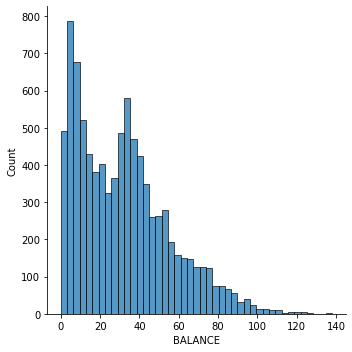

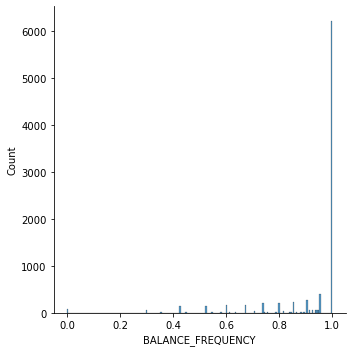

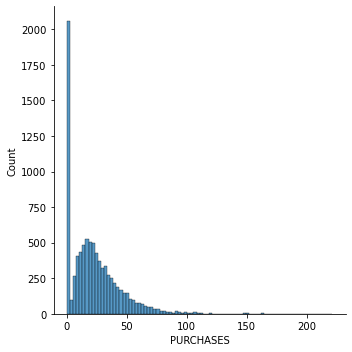

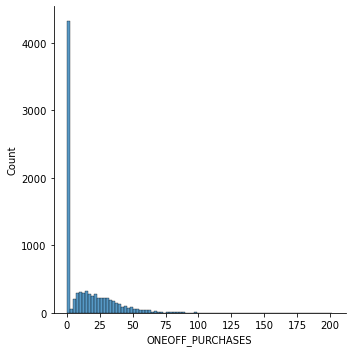

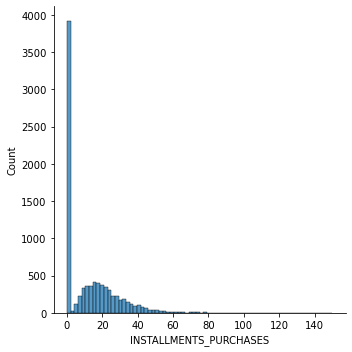

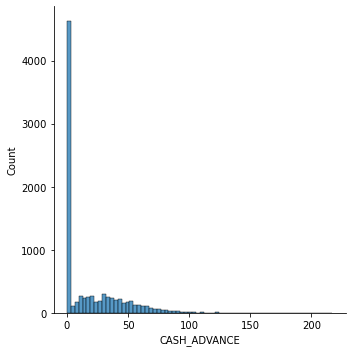

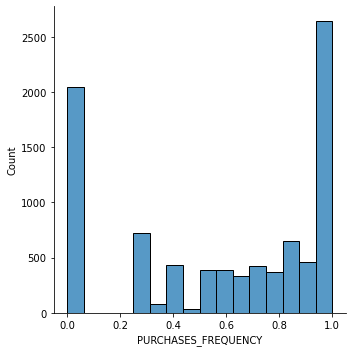

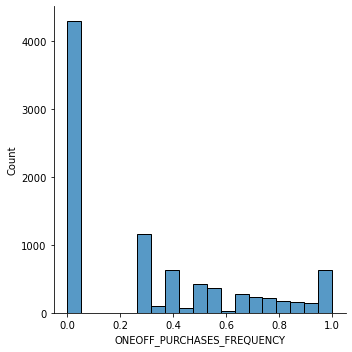

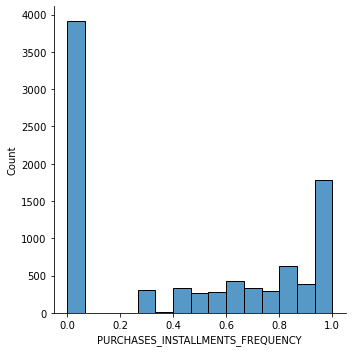

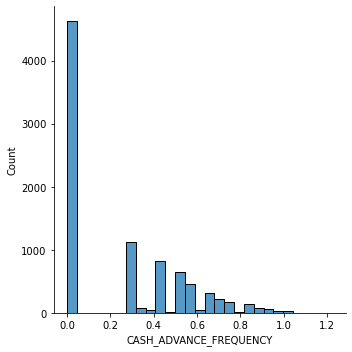

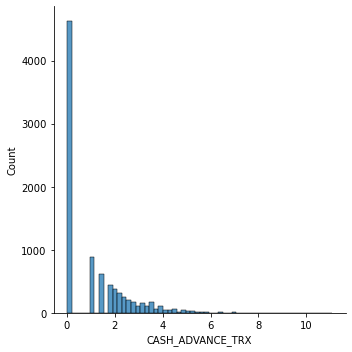

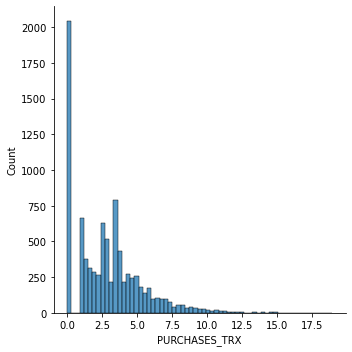

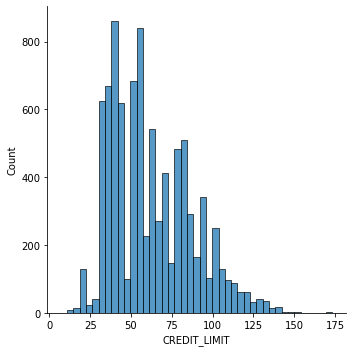

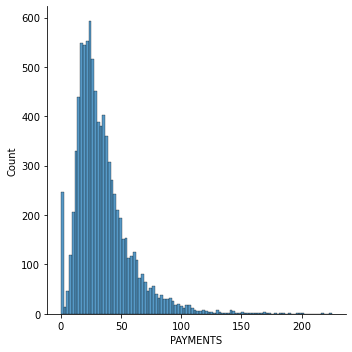

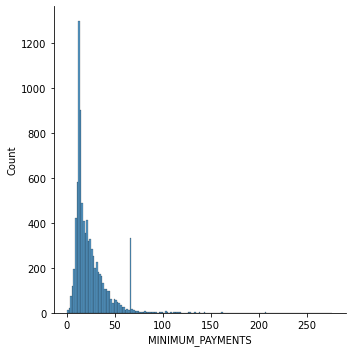

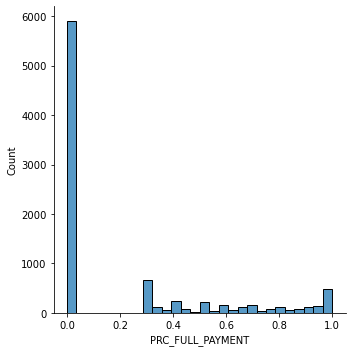

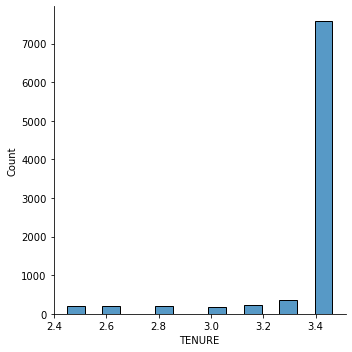

In [17]:
for x in data.columns:
    sns.displot(data[x])

Text(0.5, 1.0, 'Correlation between different fearures')

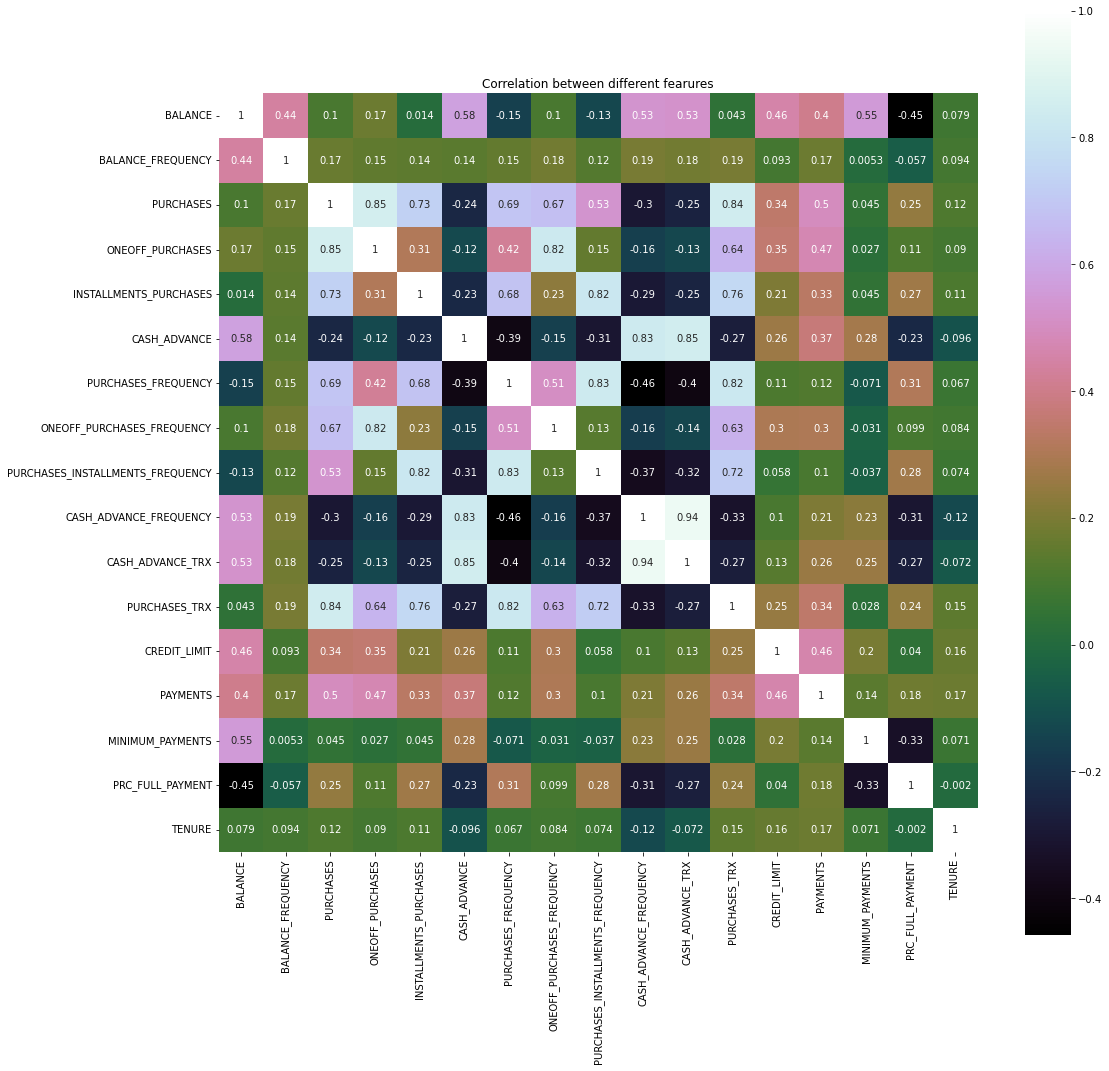

In [18]:
correlation = data.corr()
plt.figure(figsize=(17,17))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between different fearures')

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data = scaler.fit_transform(data)

print(data)

[[-1.0780545  -0.09712559 -0.59690132 ... -0.67681784 -0.63618182
   0.35348056]
 [ 1.05361908  0.19053935 -1.0423371  ...  0.40793977  0.78887411
   0.35348056]
 [ 0.77167992  0.46414608  0.22574803 ...  0.00891447 -0.63618182
   0.35348056]
 ...
 [-1.14422589 -0.04811222 -0.49431949 ... -0.81842683  0.87531901
  -4.27612743]
 [-1.19386072 -0.04811222 -1.0423371  ... -0.90192614  0.87531901
  -4.27612743]
 [-0.52978249 -0.61472285  0.46555636 ... -0.80196187 -0.63618182
  -4.27612743]]


In [20]:
from sklearn.decomposition import PCA

In [21]:
pca=PCA(n_components=2)

In [22]:
pca.fit(data)

PCA(n_components=2)

In [23]:
pca=pca.transform(data)

In [24]:
pca.shape

(8950, 2)

In [25]:
K=range(1,20)
wss=[]
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(pca)
    wss.append(kmeans.inertia_)

In [26]:
elbow=pd.DataFrame({'Clusters':K,'WSS':wss})

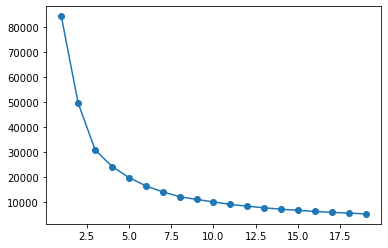

In [27]:
plt.plot(K,wss, marker = 'o')

In [28]:
kmeans_pca = KMeans(n_clusters=3,init='k-means++')

In [29]:
label= kmeans_pca.fit_predict(pca)

In [30]:
print(label)

[2 1 2 ... 2 1 2]


In [31]:
filtered_label0=pca[label==0]

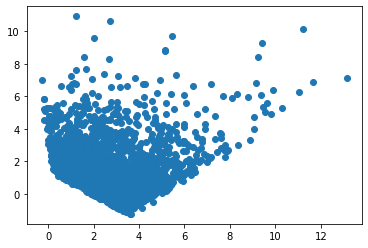

In [32]:
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

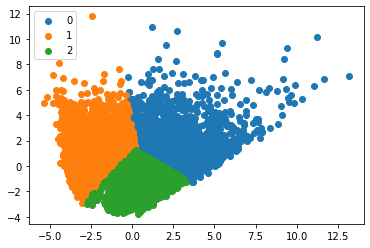

In [33]:
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(pca[label == i , 0] ,pca[label == i , 1] , label = i)
plt.legend()
plt.show()